<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/pandas_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [3]:
df = pd.read_json(url)

In [4]:
df.get('patients_summary').get('data')

[{'小計': 1, '日付': '2020-01-24T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-25T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-26T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-27T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-28T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-29T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-30T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-31T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-01T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-02T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-03T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-04T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-05T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-06T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-07T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-08T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-09T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-10T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-11T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-12T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-02-13T08:00:00.000Z'},
 {'小計': 2, '日付': '2020-02-14T08:00

In [5]:
df = pd.DataFrame(df['patients_summary']['data'])

In [6]:
df

,日付,小計
0,2020-01-24T08:00:00.000Z,1
1,2020-01-25T08:00:00.000Z,1
2,2020-01-26T08:00:00.000Z,0
3,2020-01-27T08:00:00.000Z,0
4,2020-01-28T08:00:00.000Z,0
...,...,...
664,2021-11-18T08:00:00.000Z,20
665,2021-11-19T08:00:00.000Z,16
666,2021-11-20T08:00:00.000Z,16
667,2021-11-21T08:00:00.000Z,20


In [7]:
df.index = pd.to_datetime(df['日付'])

In [8]:
_df = pd.DataFrame(df['小計'], index=df.index)
_df

,小計
日付,
2020-01-24 08:00:00+00:00,1
2020-01-25 08:00:00+00:00,1
2020-01-26 08:00:00+00:00,0
2020-01-27 08:00:00+00:00,0
2020-01-28 08:00:00+00:00,0
...,...
2021-11-18 08:00:00+00:00,20
2021-11-19 08:00:00+00:00,16
2021-11-20 08:00:00+00:00,16


In [9]:
df.index

DatetimeIndex(['2020-01-24 08:00:00+00:00', '2020-01-25 08:00:00+00:00',
               '2020-01-26 08:00:00+00:00', '2020-01-27 08:00:00+00:00',
               '2020-01-28 08:00:00+00:00', '2020-01-29 08:00:00+00:00',
               '2020-01-30 08:00:00+00:00', '2020-01-31 08:00:00+00:00',
               '2020-02-01 08:00:00+00:00', '2020-02-02 08:00:00+00:00',
               ...
               '2021-11-13 08:00:00+00:00', '2021-11-14 08:00:00+00:00',
               '2021-11-15 08:00:00+00:00', '2021-11-16 08:00:00+00:00',
               '2021-11-17 08:00:00+00:00', '2021-11-18 08:00:00+00:00',
               '2021-11-19 08:00:00+00:00', '2021-11-20 08:00:00+00:00',
               '2021-11-21 08:00:00+00:00', '2021-11-22 08:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='日付', length=669, freq=None)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from tqdm.notebook import tqdm

%matplotlib inline

In [11]:
sns.set()

In [12]:
w_mean = df.groupby(pd.Grouper(freq='W')).mean()

In [13]:
smonth_mean = df.groupby(pd.Grouper(freq='SM')).mean()

In [14]:
month_mean = df.groupby(pd.Grouper(freq='M')).mean()

In [15]:
q_mean = df.groupby(pd.Grouper(freq='Q')).mean()

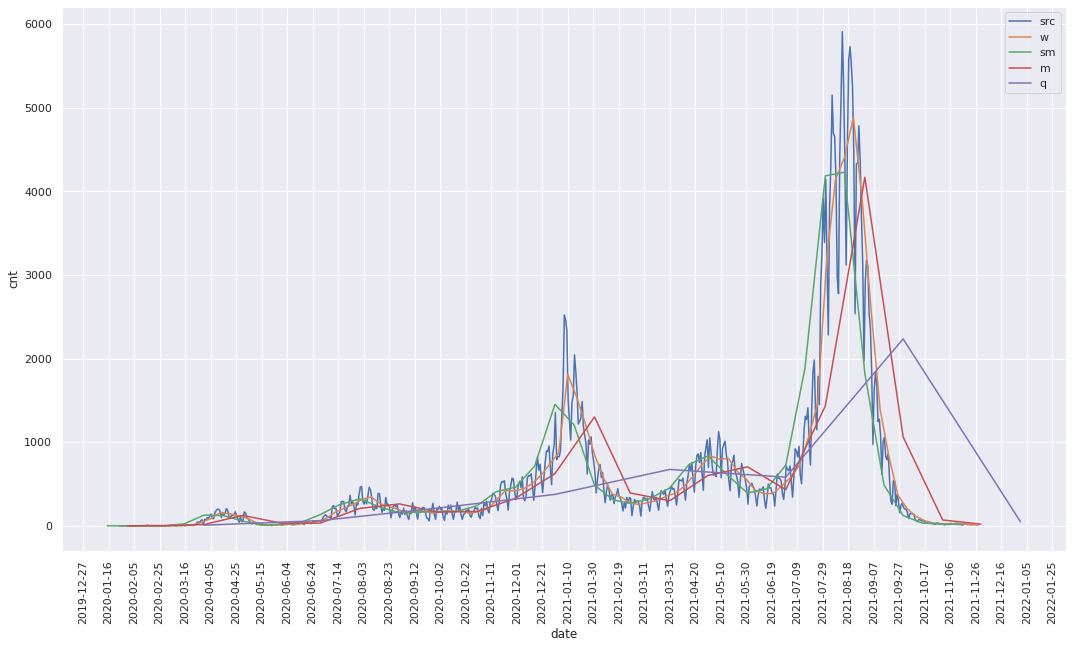

In [16]:
fig, ax = plt.subplots(figsize = (18,10)) 

x = df['日付']

ax.plot(_df, label='src')
ax.plot(w_mean, label='w')
ax.plot(smonth_mean, label='sm')
ax.plot(month_mean, label='m')
ax.plot(q_mean, label='q')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [17]:
w_mean_2 = df.resample('W').mean()

In [18]:
smonth_mean_2 = df.resample('SM').mean()

In [19]:
month_mean_2 = df.resample('M').mean()

In [20]:
q_mean_2 = df.resample('Q').mean()

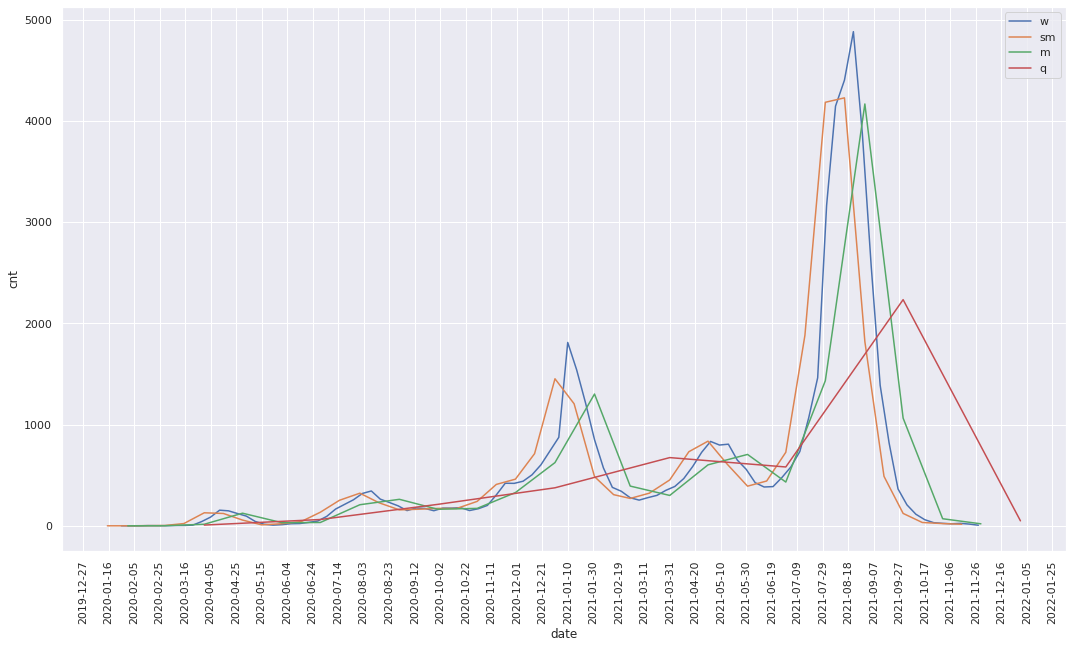

In [21]:
fig, ax = plt.subplots(figsize = (18,10)) 

x = df['日付']

ax.plot(w_mean_2, label='w')
ax.plot(smonth_mean_2, label='sm')
ax.plot(month_mean_2, label='m')
ax.plot(q_mean_2, label='q')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))